## HelpDesk.ai
---
`Claude GenAI App - Revolutionizing Customer Support throuh Automation`

`HelpDesk.ai:` A Smart AI for Answering Questions from internal knowledgebase: Harnessing the Power of RAG LLMs, SQL /customer databases, Documents using GenAI LLM Tools and Function calling.

The objective is to develop an AI capable of answering questions by harnessing information from websites, tutorials, ServiceNow, customer support resources, and transactional databases.

Streamlining Interactions: An Exploration of Automated Chat Moderation and Command Response Systems

**Author:** Amit Shukla

**Connect**

[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/youtube.svg" width=40 height=50>](https://youtube.com/@Amit.Shukla)
[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/github.svg" width=40 height=50>](https://github.com/AmitXShukla)
[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/medium.svg" width=40 height=50>](https://medium.com/@Amit-Shukla)
[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/twitter_1.svg" width=40 height=50>](https://twitter.com/ashuklax)

# Objective
In this blog, we will build an automated Helpdesk system that
1. authenticates user identity and validates user queries based on their access level.
2. The system will accept user queries and retrieve the requested information from the appropriate database using a generated SQL query.
3. The system will also utilize a vector database to search for relevant job-aids, user manuals, and service now/help desk information.
4. Finally, the system will format the response using a language model and provide it to the user.

The automated Helpdesk system will ensure that users can access the information they need efficiently and securely.

# Process Flow

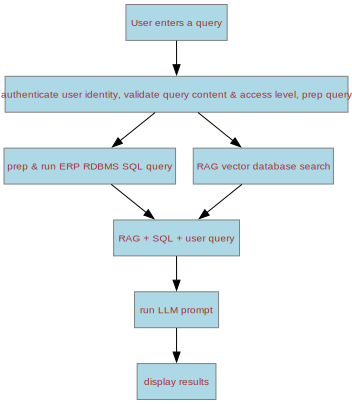

In [9]:
import graphviz

dot = graphviz.Digraph()

dot.attr('node', shape='box', style="filled", fillcolor="lightblue", color="grey", fontcolor="brown", fontname = "Helvetica,Arial,sans-serif", fontsize = "10")
dot.node('A', 'User enters a query')
dot.node('B', 'authenticate user identity, validate query content & access level, prep query')
dot.node('C1', 'prep & run ERP RDBMS SQL query')
dot.node('C2', 'RAG vector database search')
dot.node('D', 'RAG + SQL + user query')
dot.node('E', 'run LLM prompt')
dot.node('F', 'display results')

dot.edge('B', 'C1', dir='forward')
dot.edge('B', 'C2', dir='forward')
dot.edge('C1', 'D', dir='forward')
dot.edge('C2', 'D', dir='forward')
dot.edges(['AB', 'DE', 'EF'])

dot

# Data Flow

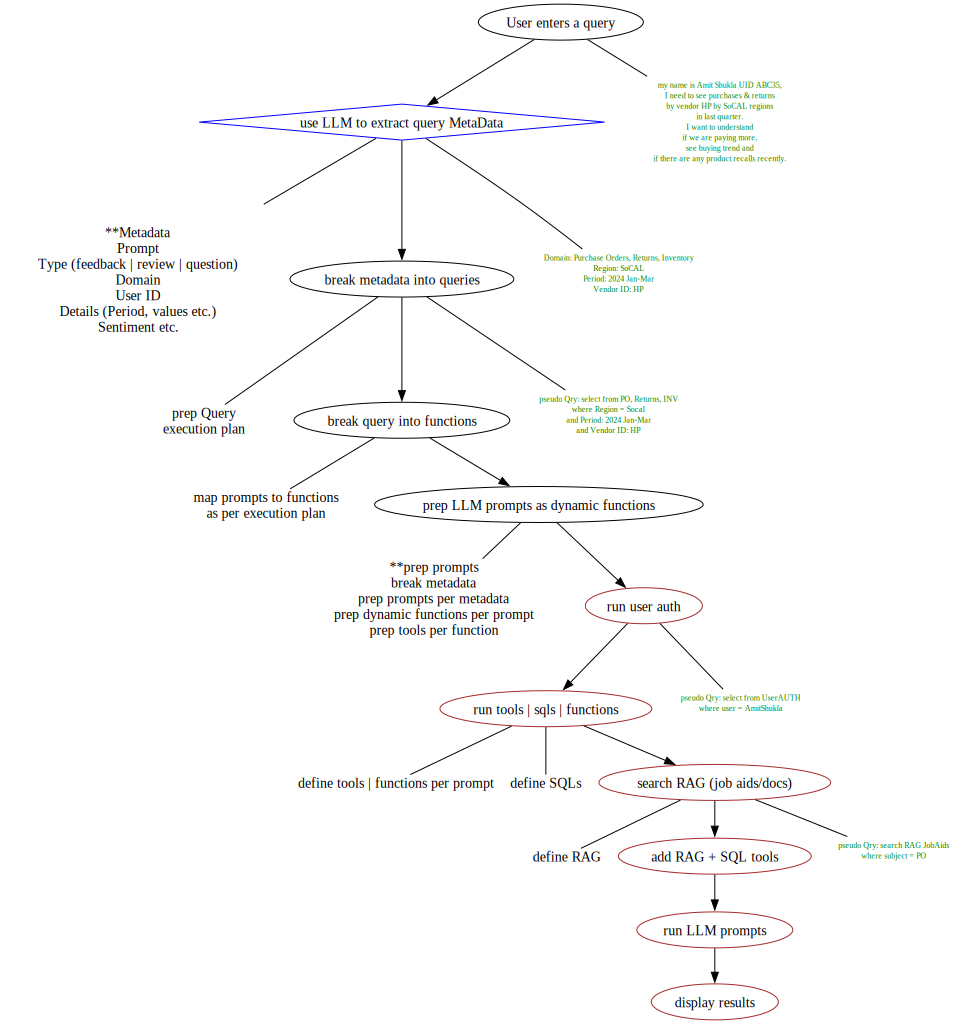

In [11]:
import graphviz

dot = graphviz.Digraph()
# dot.attr(size='8,6')
dot.node('A', 'User enters a query')
# dot.attr('node', shape='box', color="red", fontname = "Helvetica,Arial,sans-serif", fontsize = "10")
dot.attr('node', shape='diamond', color="blue")
dot.node('B', 'use LLM to extract query MetaData')
dot.attr('node', shape='plaintext', color="grey")
dot.node('B1', """
               **Metadata
               Prompt
               Type (feedback | review | question)
               Domain
               User ID
               Details (Period, values etc.)
               Sentiment etc.
             """)
dot.attr('node', shape='ellipse', color="black")
dot.node('C', 'break metadata into queries')
dot.attr('node', shape='plain', color="grey")
dot.node('C1', """prep Query
                 execution plan""")
dot.attr('node', shape='ellipse', color="black")
dot.node('D', 'break query into functions')
dot.attr('node', shape='plain', color="grey")
dot.node('D1', """map prompts to functions
                 as per execution plan""")
dot.attr('node', shape='ellipse', color="black")
dot.node('E', 'prep LLM prompts as dynamic functions')
dot.attr('node', shape='plain', color="grey")
dot.node('E1', """**prep prompts
                  break metadata
                  prep prompts per metadata
                  prep dynamic functions per prompt
                  prep tools per function
               """)
dot.node('J1', 'define tools | functions per prompt')
dot.node('J2', 'define SQLs')
dot.node('K1', 'define RAG')
dot.attr('node', shape='ellipse', color="brown")
dot.node('I', 'run user auth')
dot.node('J', 'run tools | sqls | functions')
dot.node('K', 'search RAG (job aids/docs)')
dot.node('L', 'add RAG + SQL tools')
dot.node('M', 'run LLM prompts')
dot.node('N', 'display results')
dot.attr('node', shape='plaintext', fontcolor="green", fontsize="8")
dot.node('A21', """my name is Amit Shukla UID ABC35, 
                  I need to see purchases & returns
                  by vendor HP by SoCAL regions
                  in last quarter.
                  I want to understand
                  if we are paying more, 
                  see buying trend and
                  if there are any product recalls recently.""")
dot.node('B21', """Domain: Purchase Orders, Returns, Inventory
                  Region: SoCAL
                  Period: 2024 Jan-Mar
                  Vendor ID: HP
                  """)
dot.node('C21', """pseudo Qry: select from PO, Returns, INV
                  where Region = Socal
                    and Period: 2024 Jan-Mar
                    and Vendor ID: HP
                  """)
dot.node('I21', """pseudo Qry: select from UserAUTH
                  where user = AmitShukla
                  """)
dot.node('K21', """pseudo Qry: search RAG JobAids
                  where subject = PO
                  """)

# dot.edge('A', 'B', dir='forward')
dot.edge('B', 'B1', dir='none')
dot.edge('C', 'C1', dir='none')
dot.edge('D', 'D1', dir='none')
dot.edge('E', 'E1', dir='none')
dot.edge('J', 'J1', dir='none')
dot.edge('J', 'J2', dir='none')
dot.edge('K', 'K1', dir='none')
dot.edge('A', 'A21', dir='none')
dot.edge('B', 'B21', dir='none')
dot.edge('C', 'C21', dir='none')
dot.edge('I', 'I21', dir='none')
dot.edge('K', 'K21', dir='none')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EI', 'IJ', 'JK', 'KL', 'LM', 'MN'])

dot

# Dependencies

In [10]:
# !pip install numpy pandas matplotlib seaborn graphviz networkx sqlite3
# !pip install anthropic datasets pinecone-client voyageai

# download graphviz binaries and update system path

# sql Database

In [1]:
# build a Test Database
import sqlite3
# Connect to the test database (or create it if it doesn't exist)
conn = sqlite3.connect("test_db.db")
cursor = conn.cursor()

# Create a sample table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS orders (
        id INTEGER PRIMARY KEY,
        item_id INTEGER,
        item_descr TEXT,
        order_descr TEXT,
        shipto TEXT,
        qty INTEGER,
        price FLOAT
    )
""")

# Insert sample data
sample_data = [
    (1, 1234, "HP Monitors",  "Purchase for IT Department", "123 Main St. Los Angeles CA", 1, 313.50),
    (2, 1234, "HP Monitors",  "Purchase for Sales Department", "123 Main St. Los Angeles CA", 1, 313.50),
    (3, 1234, "HP Monitors",  "Purchase for Mkt Department", "123 Main St. Los Angeles CA", 1, 313.50),
    (4, 1234, "HP Monitors",  "Purchase for Support Department", "123 Main St. Los Angeles CA", 1, 313.50),
    (5, 1234, "HP Monitors",  "Purchase for Operations Department", "123 Main St. Los Angeles CA", 3, 940.50)
]
cursor.executemany("INSERT INTO orders VALUES (?, ?, ?, ?, ?, ?, ?)", sample_data)
conn.commit()

In [2]:
# generate SQL query
# Define a function to send a query to Claude and get the response
def ask_claude(query, schema):
    prompt = f"""Here is the schema for a database:

{schema}

Given this schema, can you output a SQL query to answer the following question? Only output the SQL query and nothing else.

Question: {query}
"""

    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=2048,
        messages=[{
            "role": 'user', "content":  prompt
        }]
    )
    return response.content[0].text

In [3]:
# Get the database schema
schema = cursor.execute("PRAGMA table_info(orders)").fetchall()
schema_str = "CREATE TABLE orders (\n" + "\n".join([f"{col[1]} {col[2]}" for col in schema]) + "\n)"
print(schema_str)

CREATE TABLE orders (
id INTEGER
item_id INTEGER
item_descr TEXT
order_descr TEXT
shipto TEXT
qty INTEGER
price FLOAT
)


In [ ]:
# Example natural language question
question = "how many quantities of HP Monitors are ordered by IT department?"
# Send the question to Claude and get the SQL query
sql_query = ask_claude(question, schema_str)
print(sql_query)

In [ ]:
# Execute the SQL query and print the results
results = cursor.execute(sql_query).fetchall()

for row in results:
    print(row)

In [4]:
# Close the database connection
conn.close()

While the example above works well for one or two tables, in the real world, a typical ERP application may involve thousands of tables, schemas, and SQL queries.

As a solution, we plan to create a RAG Vector datastore to store,
- table Schema
- sample SQLs

When a user query is received, we'll retrieve this information from these RAG store and pass it to LLM for improved results and inference.

# Building a RAG Vector data store

---

## Building a RAG Vector SQL store

## RAG SQL Store lesson learned

It's evident that the RAG SQL store performs well for basic SQL queries and tasks. However, when it comes to supporting large ERP applications that mirror real-world business requirements, more complex SQLs are often necessary.

In such scenarios, it's advisable to apply LLM fine-tuning to the SQLs. It's worth noting that there are Hugging Face models that are specifically designed for SQLs LLM. Therefore, instead of using the RAG SQL Vector store, one should opt for a model that has been fine-tuned for SQL.

## Building a RAG Vector Job Aids store

## Building a RAG Vector discussion threads store

## Building a RAG Vector tech manuals store

# LLM query Execution plan

## build functions

## build tools

# LLM Query Execution

In [12]:
# building a RAG Vector datastore
# - SQL Store
# - Job Aids
# - Service Tickets (with resolutions)
# - Discussion Threads

In [13]:
# build synthetic SQL database

In [14]:
# define functions

# SQL functions

# define tools | query execution plan

# build dynamic prompts

# chaining prompts

In [15]:
# run prompt

# Appendix

<Figure size 800x600 with 0 Axes>

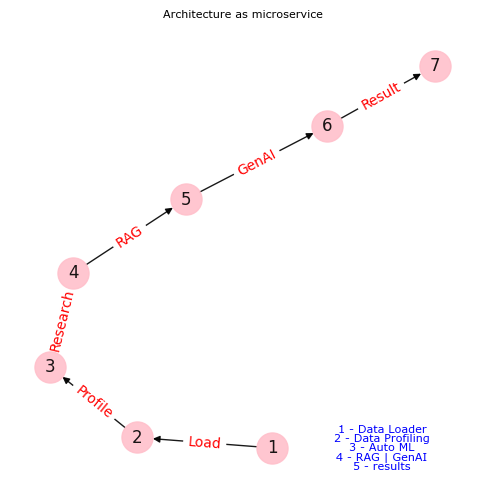

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.DiGraph()
# G.add_node()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)])

# Add labels to edges
edge_labels = {(1, 2): 'Load', (2, 3): 'Profile', (3, 4): 'Research', (4, 5): 'RAG', (5, 6): 'GenAI', (6, 7): 'Result'}

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))

fig, ax = plt.subplots(figsize=(6, 6))

nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in G.nodes()})
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Title/legend
font = {"fontname": "verdana", "color": "k", "fontsize": 8}
ax.set_title("Architecture as microservice", font)
# Change font color for legend
font["color"] = "b"

ax.text(0.80,0.12,"1 - Data Loader",horizontalalignment="center",transform=ax.transAxes,fontdict=font,)
ax.text(0.80,0.10,"2 - Data Profiling",horizontalalignment="center",transform=ax.transAxes,fontdict=font,)
ax.text(0.80,0.08,"3 - Auto ML",horizontalalignment="center",transform=ax.transAxes,fontdict=font,)
ax.text(0.80,0.06,"4 - RAG | GenAI",horizontalalignment="center",transform=ax.transAxes,fontdict=font,)
ax.text(0.80,0.04,"5 - results",horizontalalignment="center",transform=ax.transAxes,fontdict=font,)

plt.axis('off')
plt.show()